In [19]:
def save_image_no_whitespace(image, file_out):
    
    # Get dimensions of image
    dimensions = image.shape

    # Height, width, number of channels in image
    height = image.shape[0]
    width = image.shape[1]
    channels = image.shape[2]

    # Get dpi and convert from pixels to inches
    fig = plt.figure(frameon=False)
    dpi = fig.get_dpi()
    fig.set_size_inches(width/float(dpi), height/float(dpi))

    print('Image Dimension     : ', dimensions)
    print('Image Height        : ', height)
    print('Image Width         : ', width)
    print('Number of Channels  : ', channels)
    print('Dots per inch (DPI) : ', dpi)

    # To make the content fill the whole figure
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Then draw your image on it :
    ax.imshow(image)
    fig.savefig(file_out)

[]

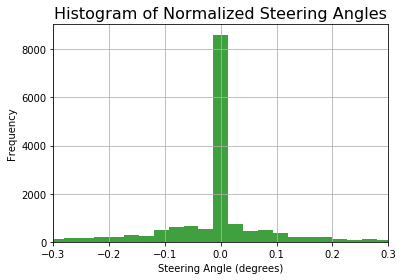

In [20]:
import csv
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Read driving log:
lines = []
with open('driving_data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# Read and extract steering angle measurements from csv file:
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    measurement = float(line[3])
    measurements.append(measurement)

# Generate histogram:    
plt.hist(measurements, bins=75, facecolor='green', alpha=0.75)
plt.xlabel('Steering Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Steering Angles', fontsize=16)
plt.grid(True)
plt.xlim(-0.3, 0.3)
plt.plot()
#plt.savefig('examples/steering_angles_histogram.jpg', dpi=100)    


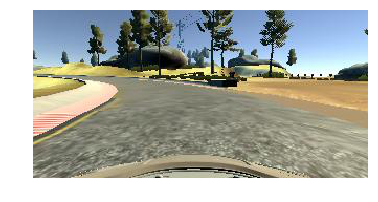

In [21]:
import csv
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#sharp left turn to flip
file_input = 'driving_data/IMG/center_2018_04_20_19_15_09_501.jpg' 

image = cv2.imread(file_input)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis('off')
tmp = plt.imshow(image)


Image Dimension     :  (160, 320, 3)
Image Height        :  160
Image Width         :  320
Number of Channels  :  3
Dots per inch (DPI) :  72.0


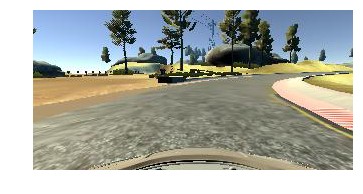

In [22]:
image_flipped = cv2.flip(image,1)

file_out = 'examples/left_turn_flipped.jpg'

save_image_no_whitespace(image_flipped, file_out)


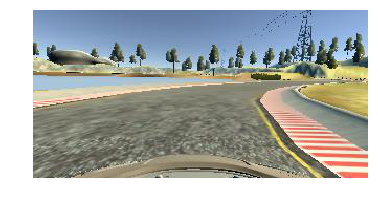

In [23]:
import csv
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#sharpest right turn to augment
file_input = 'driving_data/IMG/center_2018_04_20_19_16_12_750.jpg' 

image = cv2.imread(file_input)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis('off')
tmp = plt.imshow(image)

Image Dimension     :  (160, 320, 3)
Image Height        :  160
Image Width         :  320
Number of Channels  :  3
Dots per inch (DPI) :  72.0


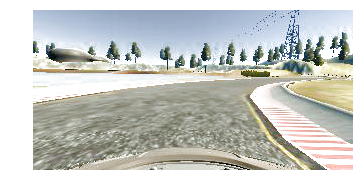

In [26]:
# Convert to HLS
image_hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
image_hls = np.array(image_hls, dtype = np.float64)

# Generate value between 0.5 and 1.5
value = np.random.uniform() + 0.5

# Scale pixel values for channel 1 (lightness)
image_hls[:,:,1] = image_hls[:,:,1] * value

# Clip all values above 255 to 255
image_hls[:,:,1][image_hls[:,:,1] > 255]= 255
image_hls = np.array(image_hls, dtype = np.uint8)
image_rgb = cv2.cvtColor(image_hls, cv2.COLOR_HLS2RGB)

#tmp2 = plt.imshow(image_RGB)
#plt.axis('off')
#plt.savefig('examples/sharp_right_turn_sunny_aug.jpg', bbox_inches='tight')

file_out = 'examples/sharp_right_turn_sunny_aug.jpg'
save_image_no_whitespace(image_rgb, file_out)

